In [13]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.

In [23]:
sFilename = "Finallllll_reddit_graph.graphml"

In [25]:
# read it back in to demonstrate it works
replyGraph = nx.readwrite.read_graphml(sFilename)


# computing the degree centrality and plotting it
lDegCentrality = nx.degree_centrality(replyGraph)


#
# TODO: write code to compute eigenvetor and katz centrality
# lEigenVectorCentrality = ...
#
lEigenVectorCentrality = nx.eigenvector_centrality(replyGraph, max_iter=1000, tol=1e-06)
lKatzCentrality = nx.katz_centrality(replyGraph)


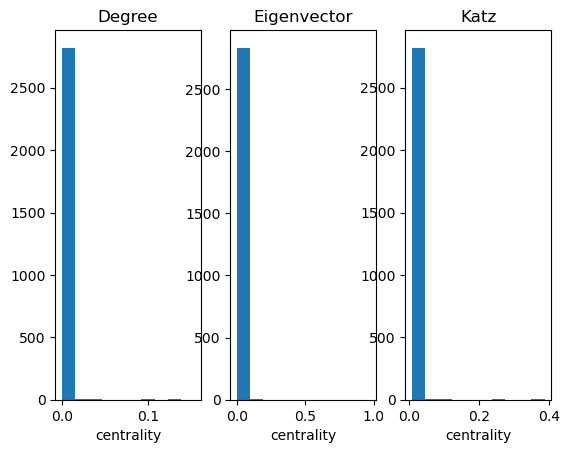

In [27]:
# plot histograms
plt.subplot(1,3,1)
plt.hist(list(lDegCentrality.values()))
plt.title('Degree')
plt.xlabel('centrality')
#
# TODO: plot the other two histograms
#
# eigenvector centrality
plt.subplot(1, 3, 2)
plt.hist(list(lEigenVectorCentrality.values()))
plt.title('Eigenvector')
plt.xlabel('centrality')
# katz centrality
plt.subplot(1, 3, 3)
plt.hist(list(lKatzCentrality.values()))
plt.title('Katz')
plt.xlabel('centrality')

plt.show()

In [29]:
#
# TODO: update the node attributes with centrality
#
# eigenvector centrality, stored in node attribute 'eigen'
for nodeId, cent in lEigenVectorCentrality.items():
    replyGraph.nodes[nodeId]['eigen'] = float(cent)

# katz centrality, stored in node attribute 'katz'
for nodeId, cent in lKatzCentrality.items():
    replyGraph.nodes[nodeId]['katz'] = float(cent)


#
# TODO: write out graph to new file
#
nx.readwrite.write_graphml(replyGraph, 'mod' + sFilename, infer_numeric_types=True)


#
# TODO: compute the other SNA measures specified in the lab
#

#
# compute clustering
# the networkx code is within format(...)
#
print('Gloabl clustering coefficient/transitivit = {}'.format(nx.transitivity(replyGraph)))


#
# compute components
#
print('number of strongly connected components = {}'.format(nx.number_strongly_connected_components(replyGraph)))
print('number of weakly connected components = {}'.format(nx.number_weakly_connected_components(replyGraph)))



#
# compute bridges
#
print(list(nx.bridges(replyGraph.to_undirected())))


Gloabl clustering coefficient/transitivit = 0.003676470588235294
number of strongly connected components = 2836
number of weakly connected components = 2
[('Dycon67', 'pennygirl108'), ('Dycon67', 'sugarcane516'), ('Dycon67', 'Strange-Western5286'), ('Dycon67', 'CockroachFinancial86'), ('Dycon67', 'cherrypod'), ('Dycon67', 'RickyFromVegas'), ('Dycon67', 'Any_Resolution9328'), ('Dycon67', 'LoCh0_xX'), ('Dycon67', 'bugsy42'), ('Dycon67', '10Years_InThe_Joint'), ('Dycon67', 'Winter_Low4661'), ('Dycon67', '_MyUsernamesMud'), ('Dycon67', 'SukOnMaGLOCKNastyBIH'), ('Dycon67', 'AgitatedKey4800'), ('Dycon67', 'Brinewielder'), ('Dycon67', 'Joelblaze'), ('Dycon67', 'BloominNShroomin'), ('Dycon67', 'Mamasan-'), ('Dycon67', 'dillybomb420'), ('Dycon67', 'Gumichi'), ('Dycon67', 'Eridain'), ('Dycon67', 'ColorlessTune'), ('Dycon67', 'Sanguinor-Exemplar'), ('Dycon67', 'Unhappy_Usual5028'), ('Dycon67', 'IuseDefaultKeybinds'), ('Dycon67', 'Poke_Jest'), ('Dycon67', 'MorskaVilaa'), ('Dycon67', 'SimilarInEver

In [56]:
import networkx as nx

# Compute degree, betweenness, and closeness centrality
deg_cent = nx.degree_centrality(replyGraph)
bet_cent = nx.betweenness_centrality(replyGraph)
close_cent = nx.closeness_centrality(replyGraph)

# Replace PageRank with Katz centrality
katz_cent = nx.katz_centrality(replyGraph, alpha=0.005, beta=1.0)

# Optional: add as node attributes
for nodeId in replyGraph.nodes():
    replyGraph.nodes[nodeId]['deg_cent'] = deg_cent.get(nodeId, 0.0)
    replyGraph.nodes[nodeId]['bet_cent'] = bet_cent.get(nodeId, 0.0)
    replyGraph.nodes[nodeId]['close_cent'] = close_cent.get(nodeId, 0.0)
    replyGraph.nodes[nodeId]['katz'] = katz_cent.get(nodeId, 0.0)


## Top 5 nodes by Degree Centrality

In [33]:
import networkx as nx

# Assuming replyGraph is your directed graph
G_undirected = nx.to_undirected(replyGraph)

# Compute degree centrality
degree_centrality = nx.degree_centrality(G_undirected)

# Sort nodes by centrality in descending order and get top 5
top_5_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 nodes by degree centrality:")
for node, centrality_value in top_5_degree:
    print(f"Node: {node}, Degree Centrality: {centrality_value:.4f}") #


Top 5 nodes by degree centrality:
Node: Giff95, Degree Centrality: 0.1545
Node: BunyipPouch, Degree Centrality: 0.1386
Node: AntiqueArtist449, Degree Centrality: 0.1362
Node: Dycon67, Degree Centrality: 0.1354
Node: AwkwardHippopotamus, Degree Centrality: 0.0991


These actors are considered “popular” or “active” and they often have a strong influence within the network due to their numerous direct connections. In a coalition or network, these nodes could be the organizations or individuals that are most active in participating or the most engaged in the network activities. They may be the ‘go-to’ people for information or resources and have a significant impact on shaping the group’s agenda (https://visiblenetworklabs.com/guides/social-network-analysis-101/#elementor-toc__heading-anchor-29).

## Top 5 nodes by Betweeness Centrality

In [60]:
import networkx as nx

# Use the undirected version for general centrality
G_undirected = nx.to_undirected(replyGraph)

# Compute betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_undirected)


top_5_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 nodes by Betweenness Centrality:")
for node, centrality_value in top_5_betweenness:
    print(f"Node: {node}, Betweenness Centrality: {centrality_value:.4f}")

Top 5 nodes by Betweenness Centrality:
Node: Deleted, Betweenness Centrality: 0.0922
Node: PrincessDiamondRing, Betweenness Centrality: 0.0067
Node: Redlightbulb34, Betweenness Centrality: 0.0048
Node: jamal-almajnun, Betweenness Centrality: 0.0048
Node: Fluffy_Mark_9314, Betweenness Centrality: 0.0046


## Top 5 nodes by Closeness Centrality

In [35]:
import networkx as nx

# Convert to undirected for simplicity (if not already done)
G_undirected = nx.to_undirected(replyGraph)

# Compute closeness centrality
closeness_centrality = nx.closeness_centrality(G_undirected)

# Sort and get top 5 nodes
top_5_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 nodes by Closeness Centrality:")
for node, centrality_value in top_5_closeness:
    print(f"Node: {node}, Closeness Centrality: {centrality_value:.4f}")


Top 5 nodes by Closeness Centrality:
Node: Giff95, Closeness Centrality: 0.3344
Node: Mr-Vince, Closeness Centrality: 0.3339
Node: Dycon67, Closeness Centrality: 0.3197
Node: xierus, Closeness Centrality: 0.3107
Node: BunyipPouch, Closeness Centrality: 0.2945


In [14]:
# If using an undirected graph
G = nx.to_undirected(replyGraph)

# Extract the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
G_lcc = G.subgraph(largest_cc).copy()

# Now compute structural metrics
print(f"Number of nodes in largest component: {len(G_lcc.nodes())}")
print(f"Number of edges in largest component: {len(G_lcc.edges())}")

diameter = nx.diameter(G_lcc)
print(f"Graph Diameter (Largest Component): {diameter}")

avg_path_length = nx.average_shortest_path_length(G_lcc)
print(f"Average Shortest Path Length (Largest Component): {avg_path_length:.4f}")


Number of nodes in largest component: 720
Number of edges in largest component: 741
Graph Diameter (Largest Component): 15
Average Shortest Path Length (Largest Component): 4.6551


## Top 5 nodes by Katz centrality

In [31]:
import networkx as nx

# Convert to undirected for simplicity (if not already done)
G_undirected = nx.to_undirected(replyGraph)

# Compute closeness centrality
katz_cent = nx.katz_centrality(replyGraph, alpha=0.005, beta=1.0)

# Sort and get top 5 nodes
top_5_katz = sorted(katz_cent.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 nodes by Katz Centrality:")
for node, centrality_value in top_5_katz:
    print(f"Node: {node}, Katz Centrality: {centrality_value:.4f}")


Top 5 nodes by Katz Centrality:
Node: Giff95, Katz Centrality: 0.0594
Node: BunyipPouch, Katz Centrality: 0.0553
Node: AntiqueArtist449, Katz Centrality: 0.0546
Node: Dycon67, Katz Centrality: 0.0544
Node: AwkwardHippopotamus, Katz Centrality: 0.0448
